# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

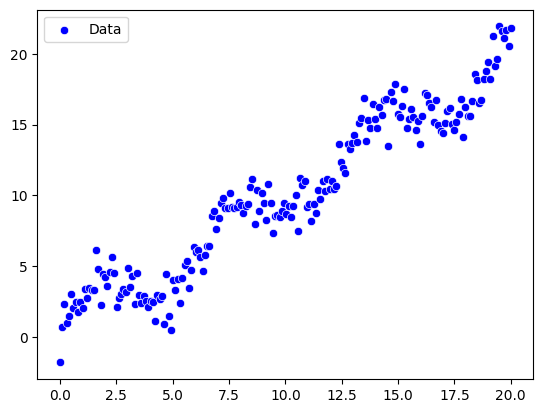

In [ ]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [2]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [3]:
df = Simple1DRegressionDataset(X,y)


In [ ]:
df[0]


(tensor([0.]), tensor([-1.8027]))

In [37]:
training_loader = DataLoader(df, shuffle=True, batch_size=32)

In [38]:
data_point = next(iter(training_loader))
data_point


[tensor([[15.8794],
         [16.4824],
         [ 1.5075],
         [15.4774],
         [10.5528],
         [10.4523],
         [12.8643],
         [ 1.0050],
         [ 6.0302],
         [18.1910],
         [19.1960],
         [ 5.1256],
         [16.2814],
         [10.0503],
         [ 3.3166],
         [10.3518],
         [ 9.6482],
         [14.7739],
         [ 1.6080],
         [18.8945],
         [15.6784],
         [ 7.3367],
         [12.7638],
         [ 7.2362],
         [12.3618],
         [13.8693],
         [ 3.5176],
         [ 3.0151],
         [13.9698],
         [ 8.7437],
         [ 7.4372],
         [ 9.5477]]),
 tensor([[14.8653],
         [16.2024],
         [ 3.0142],
         [16.5435],
         [ 9.8778],
         [10.4698],
         [11.9361],
         [ 2.4159],
         [ 5.4801],
         [17.9535],
         [19.1069],
         [ 4.1101],
         [15.7357],
         [10.4963],
         [ 1.3216],
         [ 8.3564],
         [ 9.0355],
         [16.0971]

In [39]:
# construct the model using Linear block
in_features = 1
out_features = 1

model = nn.Sequential(
    nn.Linear(in_features, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(256, 128),
    nn.LeakyReLU(0.01),
    nn.BatchNorm1d(128),
    nn.Dropout(0.2),

    nn.Linear(128, 128),
    nn.Sigmoid(),
    nn.Dropout(0.2),

    nn.Linear(128, 64),
    nn.Tanh(),
    nn.BatchNorm1d(64),
    nn.Dropout(0.1),

    nn.Linear(64, 32),
    nn.ReLU(),

    nn.Linear(32, 16),
    nn.LeakyReLU(0.01),

    nn.Linear(16, out_features)
)


In [40]:
loss_fn = nn.MSELoss()

In [41]:
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

In [42]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [44]:
train_simple_network(model,
                loss_fn,
                training_loader,
                device=device,
                epochs=40
                )


Epochs:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

115.1869888305664
243.11878967285156
409.53724670410156
540.4145660400391
689.8509826660156
784.9426498413086
920.3586959838867


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

154.91561889648438
270.19476318359375
359.5884552001953
540.0044860839844
653.0845260620117
747.6826248168945
911.2647323608398


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

103.3485336303711
236.9751968383789
361.76468658447266
498.1722640991211
632.9905014038086
725.5149383544922
823.8917999267578


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

107.54349517822266
206.0857925415039
312.3273391723633
439.0664367675781
528.0184478759766
665.9334564208984
793.4172821044922


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

103.32844543457031
173.06710052490234
271.14603424072266
371.78102111816406
468.97206115722656
576.164909362793
612.490665435791


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

95.92344665527344
159.50868606567383
204.56578063964844
260.4230079650879
302.2092475891113
346.2532844543457
365.2173843383789


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

24.460878372192383
44.94902229309082
71.60647773742676
93.72256660461426
116.33092308044434
130.19871997833252
139.45330047607422


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

14.032482147216797
28.59639263153076
43.13415050506592
65.52504634857178
84.83273220062256
98.35983562469482
112.49456214904785


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.201674938201904
19.782984256744385
43.78108835220337
54.897634983062744
66.48591661453247
76.79001665115356
118.79144716262817


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

9.99925422668457
16.826580047607422
28.380166053771973
32.485618114471436
44.06369352340698
56.07969617843628
79.96052503585815


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.7531256675720215
15.922047138214111
28.451780796051025
39.11388826370239
46.98841905593872
55.8777871131897
60.74567365646362


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

9.93211555480957
20.95389461517334
35.71241283416748
45.71811294555664
52.09551763534546
60.02674388885498
68.15249538421631


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

7.8816142082214355
16.015573978424072
28.208409786224365
33.410958766937256
38.84389114379883
50.35684013366699
68.81681251525879


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.927607536315918
12.295109748840332
22.94307231903076
33.93516731262207
46.471126556396484
59.18832588195801
79.09218788146973


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.145442962646484
14.817484855651855
22.375609397888184
27.817171096801758
33.544631004333496
39.45531177520752
49.86026668548584


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

4.592985153198242
13.64915943145752
26.090527534484863
35.158443450927734
40.73194217681885
48.44397449493408
54.870317459106445


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

10.857827186584473
16.551240921020508
24.78407382965088
31.05211114883423
36.90141773223877
44.5587043762207
46.79938793182373


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

9.28735637664795
14.559232234954834
21.905635833740234
38.05057907104492
44.16651678085327
48.9046368598938
72.59181261062622


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

9.419635772705078
16.764615535736084
36.59789228439331
46.832581996917725
53.22515344619751
62.758166790008545
82.47769498825073


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.001865863800049
13.4060959815979
18.001885890960693
24.198720455169678
33.423668384552
40.18109607696533
46.99807691574097


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

8.122040748596191
12.763241291046143
18.423244953155518
24.15229606628418
29.048584938049316
35.10817337036133
45.994728088378906


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.77122163772583
13.1430082321167
17.269062042236328
25.051848888397217
31.124649047851562
39.80367469787598
52.011409759521484


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

9.045982360839844
14.662358283996582
20.141358375549316
23.237725019454956
35.11079955101013
40.35047125816345
47.80706000328064


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

4.974807262420654
10.553520679473877
16.36074686050415
22.2457332611084
28.75231122970581
34.9150915145874
41.204214572906494


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.311459541320801
11.560015201568604
15.811808109283447
33.603792667388916
41.00963020324707
44.7470908164978
65.9261794090271


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.018071174621582
10.045863628387451
14.996417045593262
22.38679313659668
29.037297248840332
33.57337236404419
40.098087787628174


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.606701850891113
11.920956134796143
16.196147441864014
21.1254620552063
30.685390949249268
34.177786111831665
48.64648747444153


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.736070156097412
12.018705368041992
15.91480278968811
20.20579981803894
25.742583513259888
44.235846757888794
50.66778254508972


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.790842056274414
14.50100326538086
19.443308353424072
25.6017165184021
38.072946071624756
43.234936237335205
48.27342462539673


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.437265396118164
7.951260805130005
16.313733339309692
25.964819192886353
35.348511934280396
38.076371908187866
69.2637631893158


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

4.937274932861328
9.360628604888916
15.357577800750732
20.781126976013184
25.789612770080566
33.09720325469971
39.11606025695801


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.01637077331543
13.451513290405273
18.892462253570557
26.283575534820557
32.40715456008911
38.145941734313965
44.40715169906616


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.999734401702881
12.813927173614502
19.76089334487915
26.468931674957275
30.388083934783936
34.4962739944458
38.710073947906494


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

7.60414981842041
12.381832599639893
19.295991897583008
22.989274740219116
27.556276082992554
33.70036244392395
38.40155339241028


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.174223899841309
9.356771469116211
14.084022998809814
19.867328643798828
27.650991439819336
34.84352397918701
39.15973234176636


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

4.487174987792969
10.766994953155518
14.045706748962402
23.40944194793701
29.278276443481445
44.61300468444824
49.9917573928833


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.035548686981201
14.887560367584229
21.310367107391357
25.7276930809021
31.634668350219727
37.52904987335205
73.34822940826416


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

11.505776405334473
17.5328631401062
23.14476490020752
26.70820116996765
30.85709834098816
36.863381147384644
43.9716317653656


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

5.7820820808410645
12.217670917510986
17.712367057800293
24.919464111328125
35.75140190124512
42.04546642303467
47.46168375015259


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

6.122868061065674
10.145889282226562
19.20039176940918
30.28611183166504
33.51016426086426
46.223093032836914
56.95695495605469


In [45]:
# lets try our model
model.to('cpu')

model.eval()

with torch.inference_mode():
    y_pred_m2 = model(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

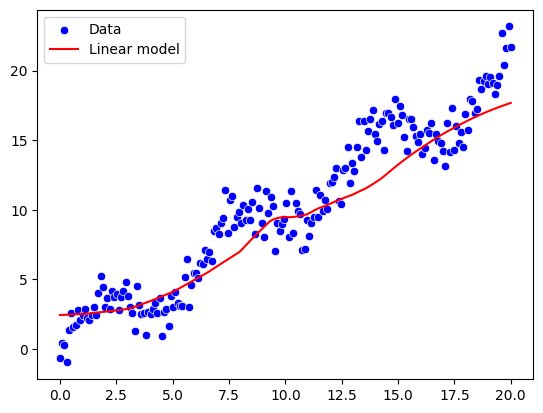

In [46]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
